In [ ]:
import sys
import numpy as np
print(sys.version)

import declarative
from phasor.utilities.ipynb.displays import *

from phasor import alm

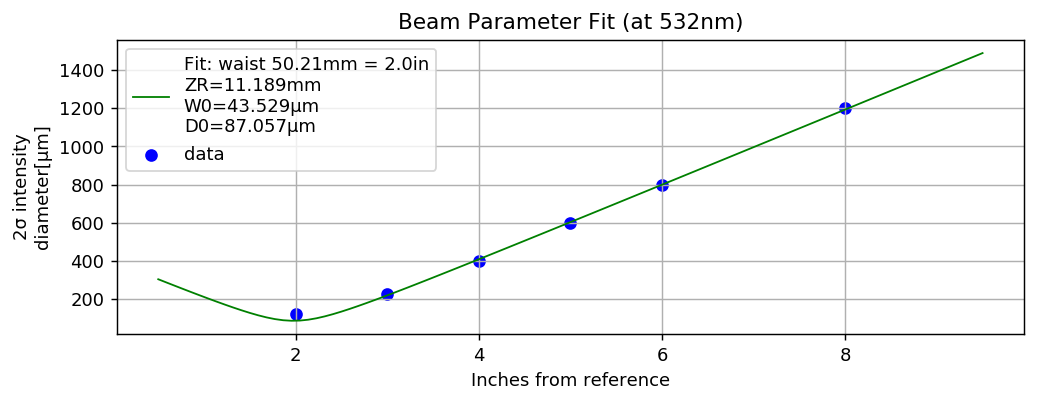

In [2]:
q_PBS = alm.QFit(                                                             
            wavelen_nm = 532.,                                                      
            D_um = [1200, 800, 400, 225, 120, 600],
            Z_in = [8, 6, 4, 3, 2, 5],                                                          
        )  
axB = q_PBS.plot()

In [3]:
sys = alm.RootSystem( )

sys.own.q_in = alm.BeamTarget(loc_in = 0, q_raw = q_PBS.q_fit)
sys.own.L1 = alm.ThinLens(loc_in = 6, f_mm = 100)
sys.own.q_out = alm.BeamTarget(loc_in = 19, q_raw = alm.ComplexBeamParam.from_Z_W0(0, 450e-6))

ax = sys.plot('to-fiber')
sys.measurements.q_target_z(1.42).value
sys.measurements.overlap_seq()

![ALM_DEMO-ipynb/to-fiber](ALM_DEMO-ipynb/to-fiber.png?1502573780 "ALM_DEMO-ipynb/to-fiber")
[png](ALM_DEMO-ipynb/to-fiber.png),  [pdf](ALM_DEMO-ipynb/to-fiber.pdf)

0.9319151186954322

In [4]:
import phasor.fitting.casadi as FIT

fitter = FIT.FitterRoot()
fitter.own.sym = FIT.FitterSym()
fitter.systems.alm = sys
fitter.sym.parameter(sys.L1.loc_in)
fitter.sym.parameter(sys.q_out.loc_in)

def objective(alm):
    return abs(alm.measurements.overlap('q_in', 'q_out'))**4
print("OLAPPRE: ", objective(sys))
fitter.own.overlap = FIT.FitterExpression(
    function = objective,
)
ret = fitter.overlap.minimize_function()
print("OVERLAP: ", objective(ret.systems.alm))
ax = ret.systems.alm.plot('quickfit')

OLAPPRE:  0.931915118695

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

OVERLAP:  1.0


![ALM_DEMO-ipynb/quickfit](ALM_DEMO-ipynb/quickfit.png?1502573787 "ALM_DEMO-ipynb/quickfit")
[png](ALM_DEMO-ipynb/quickfit.png),  [pdf](ALM_DEMO-ipynb/quickfit.pdf)

In [5]:

class QTest(alm.System):
    @declarative.dproperty
    def q_in(self):
        return alm.BeamTarget(loc_in = 0, q_raw = q_PBS.q_fit)
    @declarative.dproperty
    def L1(self):
        return alm.ThinLens(loc_in = 6, f_mm = 100)
    @declarative.dproperty
    def q_out(self):
        return alm.BeamTarget(loc_in = 19, q_raw = alm.ComplexBeamParam.from_Z_W0(0, 450e-6))

sys = alm.RootSystem( )
sys.own.test = QTest(loc_in = 0)
ax = sys.plot('to-fiber2')
sys.measurements.overlap_seq()

![ALM_DEMO-ipynb/to-fiber2](ALM_DEMO-ipynb/to-fiber2.png?1502573794 "ALM_DEMO-ipynb/to-fiber2")
[png](ALM_DEMO-ipynb/to-fiber2.png),  [pdf](ALM_DEMO-ipynb/to-fiber2.pdf)

0.9319151186954322